The aim of the project is to analyze the data of unsuccessful students

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Load the dataset

In [3]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Analyze unique values in the first five columns

In [8]:
for column in df.columns[:5]:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"'{column}' number of unique values ​​in column: {unique_count}")
    print(f"Unique values: {unique_values}\n")

'gender' number of unique values ​​in column: 2
Unique values: ['female' 'male']

'race/ethnicity' number of unique values ​​in column: 5
Unique values: ['group B' 'group C' 'group A' 'group D' 'group E']

'parental level of education' number of unique values ​​in column: 6
Unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

'lunch' number of unique values ​​in column: 2
Unique values: ['standard' 'free/reduced']

'test preparation course' number of unique values ​​in column: 2
Unique values: ['none' 'completed']



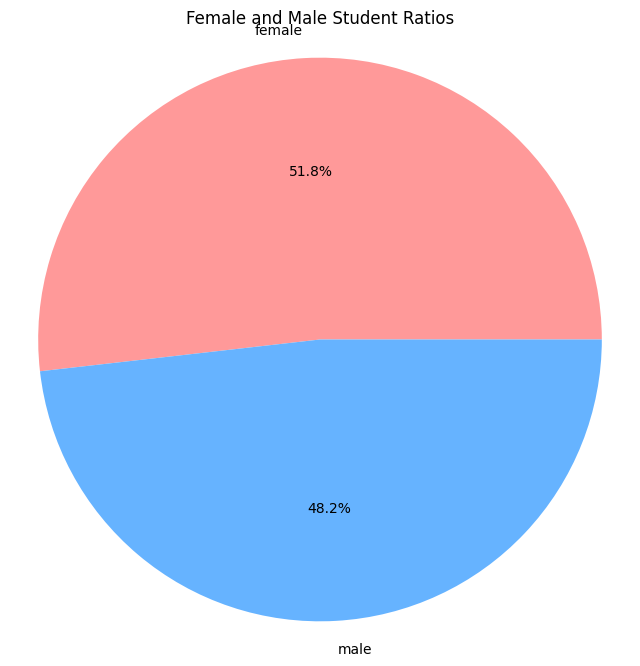

In [9]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Female and Male Student Ratios')
plt.axis('equal')  
plt.show()
